## **Exercise IV**

Parsa Youssefpour

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install pyvirtualdisplay
!sudo apt-get install xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
import random

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten
from keras.optimizers import SGD
import keras
import tensorflow as tf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes


In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
env = gym.make("CartPole-v0")
state_size = env.observation_space.shape[0]
actions = env.action_space.n

In [ ]:
alpha = 0.001
model = Sequential()
model.add(Flatten(input_shape = (state_size,)))
model.add(Dense(24,activation = "relu"))
model.add(Dense(24,activation = "relu"))
model.add(Dense(2,activation = "linear"))
model.compile(loss="mse", optimizer=SGD(lr=alpha))

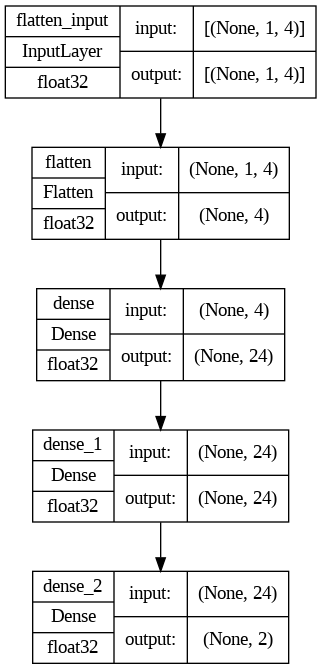

In [ ]:
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB", #TB: vertical; LR: hor
    expand_nested=True,
    dpi=96,
)

Iterations that were run: 9


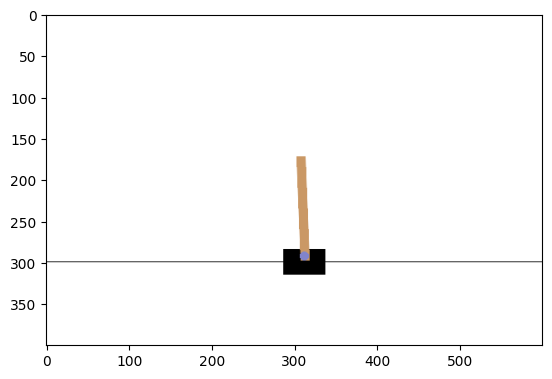

In [ ]:
#collecting states and actions to create a dataset
env = gym.make("CartPole-v0")
obs = env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)
states = [obs]
actions = []
for i in range(10):
  action = int(input("left(0) or right(1)"))
  actions.append(action)
  obs, reward, done, info = env.step(action)
  states.append(obs)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)
env.close()
print("Iterations that were run:",i)

In [ ]:
print(states)
print(actions)

[array([0.04028303, 0.02235033, 0.03669097, 0.0255176 ], dtype=float32), array([ 0.04073004, -0.17327806,  0.03720132,  0.3295474 ], dtype=float32), array([0.03726448, 0.02129511, 0.04379227, 0.04882427], dtype=float32), array([ 0.03769038,  0.21576265,  0.04476875, -0.22972657], dtype=float32), array([ 0.04200563,  0.4102172 ,  0.04017422, -0.50795853], dtype=float32), array([ 0.05020998,  0.60475075,  0.03001505, -0.7877154 ], dtype=float32), array([ 0.06230499,  0.79944783,  0.01426074, -1.0708064 ], dtype=float32), array([ 0.07829395,  0.6041403 , -0.00715538, -0.7736823 ], dtype=float32), array([ 0.09037676,  0.4091175 , -0.02262903, -0.48325926], dtype=float32), array([ 0.0985591 ,  0.2143221 , -0.03229421, -0.19779336], dtype=float32), array([ 0.10284555,  0.01967659, -0.03625008,  0.08452982], dtype=float32)]
[0, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [ ]:
training_states = states[:-1]
training_actions = tf.one_hot(actions, 2)

train_dataset = tf.data.Dataset.from_tensor_slices((training_states, training_actions))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(1)

optimizer=keras.optimizers.SGD(learning_rate=0.0001)
f_ppError = keras.losses.MeanSquaredError()

for epoch in range(50):
  for (state, action) in train_dataset:
    with tf.GradientTape() as tape:
      pred = model(state,training = True)
      ppError = f_ppError(action,pred)
    grads = tape.gradient(ppError,model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    print("Error: %f" % float(ppError))

Error: 0.372812
Error: 0.248861
Error: 0.359743
Error: 0.350139
Error: 0.332746
Error: 0.306140
Error: 0.356639
Error: 0.354496
Error: 0.200846
Error: 0.343251
Error: 0.343078
Error: 0.248580
Error: 0.305745
Error: 0.200596
Error: 0.359455
Error: 0.372374
Error: 0.349444
Error: 0.356075
Error: 0.354204
Error: 0.332596
Error: 0.353998
Error: 0.305440
Error: 0.358985
Error: 0.248091
Error: 0.332382
Error: 0.349090
Error: 0.200408
Error: 0.342702
Error: 0.355673
Error: 0.371875
Error: 0.348751
Error: 0.200188
Error: 0.355278
Error: 0.247413
Error: 0.371861
Error: 0.358763
Error: 0.304528
Error: 0.342642
Error: 0.353541
Error: 0.332193
Error: 0.371364
Error: 0.331895
Error: 0.247628
Error: 0.355063
Error: 0.353208
Error: 0.304482
Error: 0.347970
Error: 0.358133
Error: 0.341950
Error: 0.200002
Error: 0.331784
Error: 0.341716
Error: 0.354724
Error: 0.357631
Error: 0.370775
Error: 0.200133
Error: 0.352703
Error: 0.247246
Error: 0.347594
Error: 0.303940
Error: 0.199582
Error: 0.354072
Error: 0